___
___
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [4]:
data = pd.read_csv("loan_data.csv")
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [11]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

Row Count: 9578

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

In [43]:
data.hist?

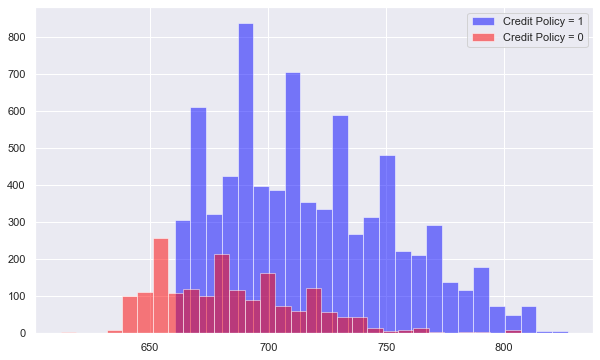

In [64]:
plt.figure(figsize=(10,6))
data[data["credit.policy"]==1]["fico"].hist(bins=30, color="blue", alpha=0.5, label="Credit Policy = 1")
data[data["credit.policy"]==0]["fico"].hist(bins=30, color="red", alpha=0.5, label="Credit Policy = 0")
plt.legend()
plt.show()

** Create a similar figure, except this time select by the not.fully.paid column.**

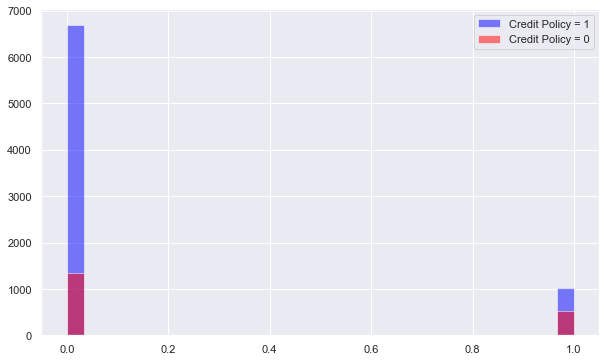

In [65]:
plt.figure(figsize=(10,6))
data[data["credit.policy"]==1]["not.fully.paid"].hist(bins=30, color="blue", alpha=0.5, label="Credit Policy = 1")
data[data["credit.policy"]==0]["not.fully.paid"].hist(bins=30, color="red", alpha=0.5, label="Credit Policy = 0")
plt.legend()
plt.show()

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

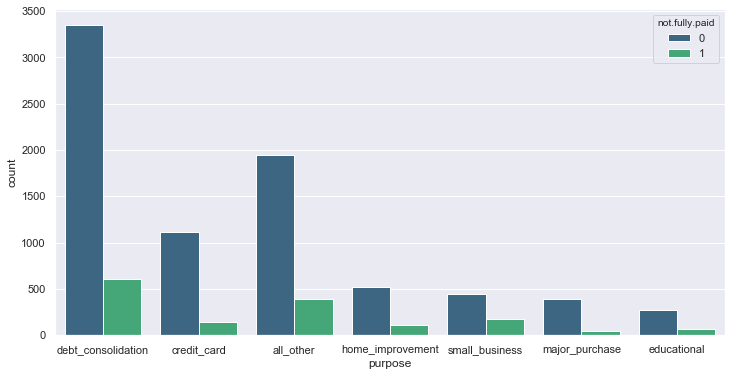

In [71]:
plt.figure(figsize=(12,6))
sns.countplot(x="purpose", hue="not.fully.paid", palette="viridis", data=data)

In [75]:
data.corr()[["not.fully.paid"]]

,not.fully.paid
credit.policy,-0.158119
int.rate,0.159552
installment,0.049955
log.annual.inc,-0.033439
dti,0.037362
fico,-0.149666
days.with.cr.line,-0.029237
revol.bal,0.053699
revol.util,0.082088
inq.last.6mths,0.149452


# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [78]:
data["purpose"].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [80]:
categorical_features = ["purpose"]
final_data = pd.get_dummies(data,columns=categorical_features,drop_first=True)

In [83]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [85]:
from sklearn.model_selection import train_test_split

X = final_data.drop("not.fully.paid", axis=1)
y = final_data["not.fully.paid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [86]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [88]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [90]:
preds = dtree.predict(X_test)

In [105]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve, roc_auc_score

In [96]:
print(classification_report(preds, y_test))
print('\n')
print(confusion_matrix(preds, y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2625
           1       0.23      0.22      0.22       536

    accuracy                           0.74      3161
   macro avg       0.54      0.53      0.53      3161
weighted avg       0.74      0.74      0.74      3161



[[2231  394]
 [ 419  117]]


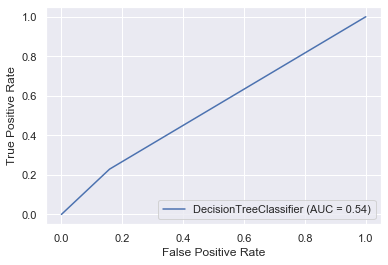

In [103]:
fpr, tpr, thresholds = roc_curve(preds, y_test)
plot_roc_curve(dtree, X_test, y_test)

In [106]:
roc_auc_score(preds, y_test)

0.534094171997157

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [109]:
preds = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [110]:
print(classification_report(preds, y_test))
print('\n')
print(confusion_matrix(preds, y_test))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      3134
           1       0.02      0.33      0.03        27

    accuracy                           0.84      3161
   macro avg       0.51      0.59      0.47      3161
weighted avg       0.98      0.84      0.90      3161



[[2632  502]
 [  18    9]]


In [111]:
roc_auc_score(preds, y_test)

0.5865773239736226

**Show the Confusion Matrix for the predictions.**

In [31]:
   0   1
0 TN  FP
1 FN  TP

[[2427    4]
 [ 438    5]]


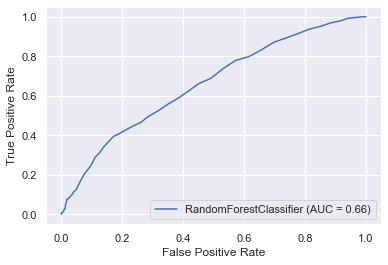

In [112]:
plot_roc_curve(rfc, X_test, y_test)